In [1]:
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from support_function.read_data import *
from support_function.reporting import reporting
from support_function.evaluate import *
import random

In [2]:
df_normalized = read_cleaned_data()

In [3]:
X = np.array(df_normalized[
    [
        "totalAsset",
        "averageTotalAsset",
        "frequencyMountOfTransaction",
        "borrow_per_balance",
        "deposit_per_asset",
        "borrow_per_deposit",
        "totalValueOfLiquidation",
        "numberOfLiquidation",
        "frequencyOfTransaction",
        "frequencyOfDappTransactions",
        "numberOfInteractedDapps",
        "typesOfInteractedDapps",
        "numberOfReputableDapps",
        "age",
    ]
].values)

first_y = df_normalized["1st_label"].values
second_y = df_normalized["2nd_label"].values

In [4]:
def nomal(arr):
    sum = np.sum(arr)
    arr = arr / sum
    return arr

class Genetic_Alogorithm:
    def __init__(
        self, X, first_y, second_y, num_params, num_solutions=100, mutation_rate=0.2
    ):
        self.X = X
        self.first_y = first_y
        self.second_y = second_y
        self.num_params = num_params
        self.num_solutions = num_solutions
        self.mutation_rate = mutation_rate
        (
            self.X_train,
            self.X_test,
            self.first_y_train,
            self.first_y_test,
            self.second_y_train,
            self.second_y_test,
        ) = train_test_split(
            X, first_y, second_y, test_size=0.2, stratify=first_y, random_state=40
        )

    def initialize_solutions(self):
        solutions = []
        for _ in range(self.num_solutions):
            # Sử dụng np.random.uniform để khởi tạo giá trị trong khoảng từ -500 đến 500
            solution = np.random.uniform(0, 1, size=self.num_params)
            solutions.append(tuple(nomal(solution)))
        return solutions

    def mutate(self, child, mutation_rate):
        if mutation_rate is None:
            mutation_rate = self.mutation_rate
        mutated_child = tuple(
            [
                gene * np.random.uniform(1 - self.mutation_rate, 1 + self.mutation_rate)
                for gene in child
            ]
        )
        return mutated_child

    def crossover(self, parent1, parent2, type=None):
        if type is None or type == "one_point":
            crossover_point = np.random.randint(1, len(parent1) - 1)
            child = list(parent1[:crossover_point]) + list(parent2[crossover_point:])
            return tuple(child)
        elif type == "two_point":
            crossover_point1, crossover_point2 = np.sort(
                np.random.choice(range(1, len(parent1)), 2, replace=False)
            )
            child = (
                list(parent1[:crossover_point1])
                + list(parent2[crossover_point1:crossover_point2])
                + list(parent1[crossover_point2:])
            )
            return tuple(nomal(child))
        elif type == "mean":
            child = [(parent1[i] + parent2[i]) / 2 for i in range(len(parent1))]
            return tuple(child)

    def evolve(self, solutions, crossover="None", mutate_rate="None"):
        rankedsolutions = [(self.fitness(theta), theta) for theta in solutions]
        rankedsolutions = sorted(rankedsolutions, key=lambda x: x[0], reverse=True)
        print(f"fitness:{rankedsolutions[0][0]}")
        bestSolutions = rankedsolutions[:20] + rankedsolutions[-5:]

        new_solution = [rankedsolutions[0][1]]

        for _ in range(self.num_solutions - 1):
            parent1, parent2 = (
                random.choice(bestSolutions)[1],
                random.choice(bestSolutions)[1],
            )
            child1 = self.crossover(parent1, parent2, crossover)
            child1 = self.mutate(child1, mutate_rate)
            new_solution.append(nomal(child1))
        return new_solution, rankedsolutions[0][0]

    # support funcion
    def fitness(self, theta):
        y_pred = self.predict(self.X_train, theta)
        return self.accuracy_score(self.first_y_train, self.second_y_train, y_pred)

    def accuracy_score(self, y_train, second_y_train, y_pred):
        y_train = np.array(y_train)
        second_y_train = np.array(second_y_train)
        y_pred = np.array(y_pred)
        condition = np.logical_or(y_pred == second_y_train, y_pred == y_train)
        count = np.sum(condition)
        accuracy = count / len(y_train)
        return accuracy

    def predict(self, matrices, theta):
        list_scores = np.dot(matrices, theta)
        label = []
        for score in list_scores:
            if score < 580:
                label.append(0)
            elif score >= 580 and score < 670:
                label.append(1)
            elif score >= 670 and score < 740:
                label.append(2)
            elif score >= 740 and score < 800:
                label.append(3)
            elif 800 <= score <= 850:
                label.append(4)
        return np.array(label)

In [5]:
ga = Genetic_Alogorithm(X, first_y, second_y, len(X[0]))

In [6]:
solution = ga.initialize_solutions()
fitness = []
num_generations = 100
for _ in range(num_generations):
    solution, acc = ga.evolve(solution, crossover="two_point", mutate_rate=0.1)
    fitness.append(acc)

fitness:0.7068214328612454
fitness:0.7349173937256358
fitness:0.7494294543508883
fitness:0.7655903646032387
fitness:0.7946800030574696
fitness:0.8038196529772109
fitness:0.8216403323906135
fitness:0.8351805544939342
fitness:0.8355408991144258
fitness:0.8499765230019983
fitness:0.8670219155046462
fitness:0.8782253573417487
fitness:0.8801799539195667
fitness:0.8801799539195667
fitness:0.8928902914423612
fitness:0.8928902914423612
fitness:0.9001190229201018
fitness:0.9057316633726072
fitness:0.9057316633726072
fitness:0.9057316633726072
fitness:0.9109512006027582
fitness:0.9249718822000677
fitness:0.9249718822000677
fitness:0.9267626857685713
fitness:0.9270575131853372
fitness:0.9270575131853372
fitness:0.9296454427325042
fitness:0.9331942912676487
fitness:0.9331942912676487
fitness:0.9337948656351347
fitness:0.9337948656351347
fitness:0.9337948656351347
fitness:0.9337948656351347
fitness:0.9337948656351347
fitness:0.9337948656351347
fitness:0.9342753251291235
fitness:0.9342753251291235
f

In [7]:
predicted_labels = ga.predict(ga.X_test, solution[0])
print(new_accuracy(ga.first_y_test, ga.second_y_test, predicted_labels))

0.9580694474776152


In [8]:
print(precision(ga.first_y_test, ga.second_y_test, predicted_labels))

0.8116085992423763


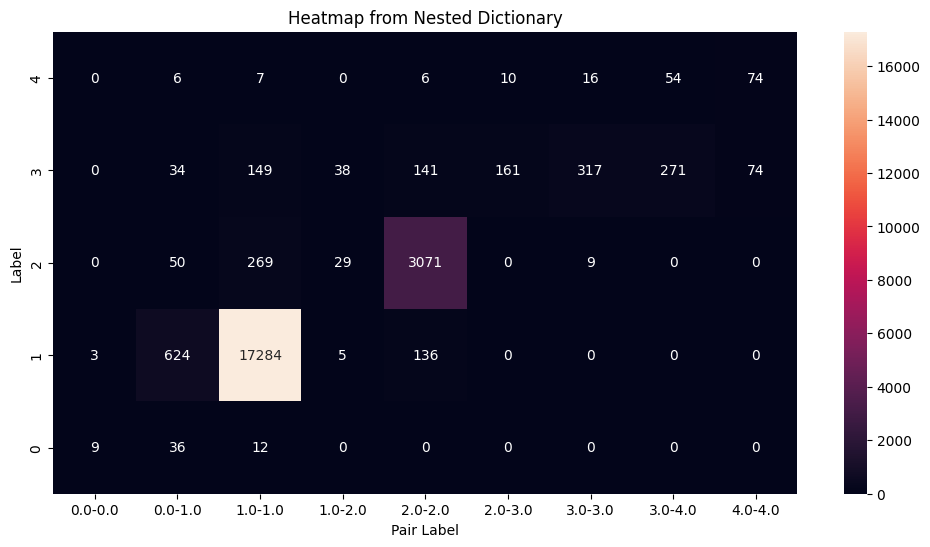

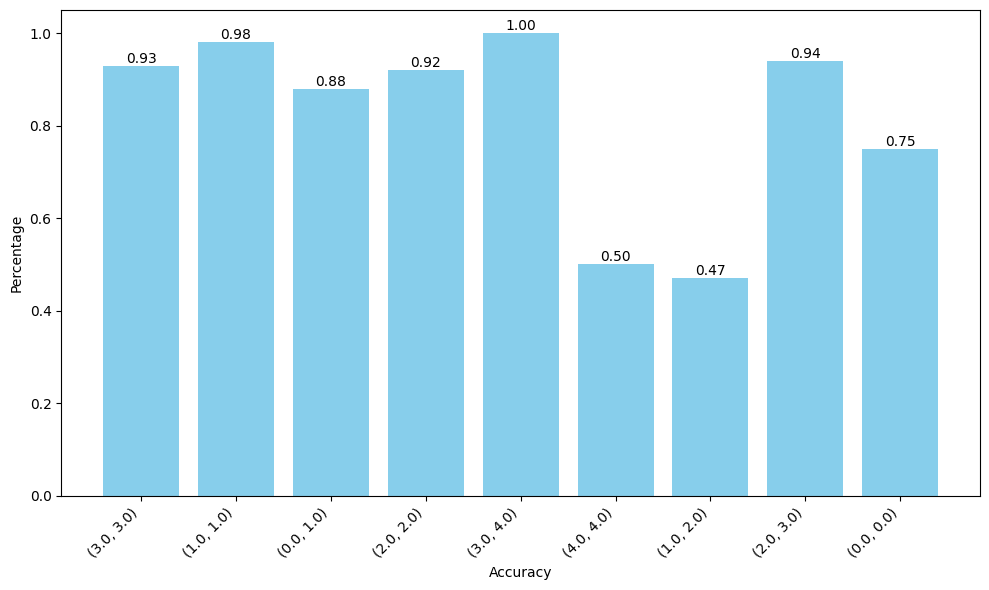

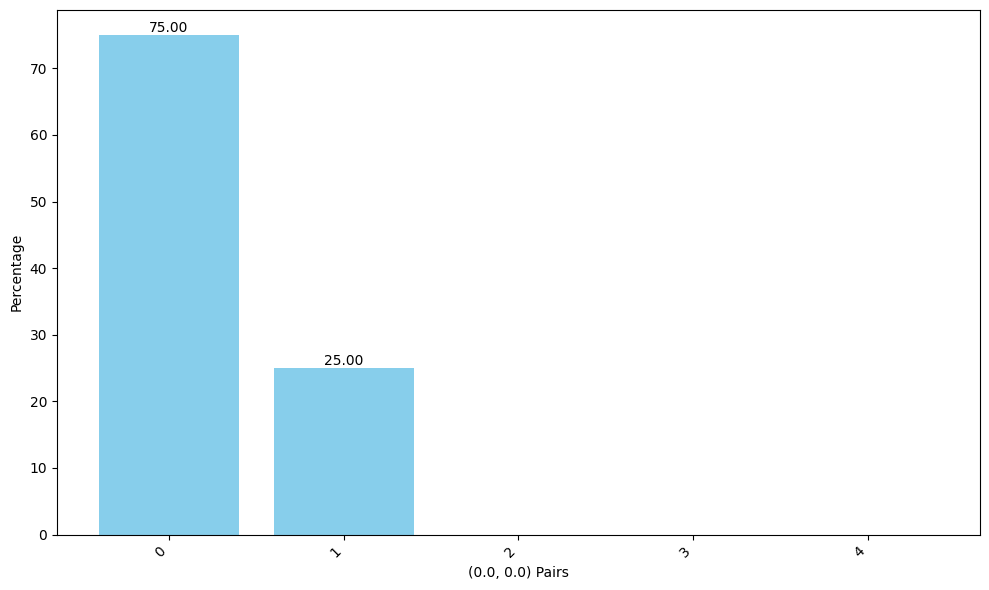

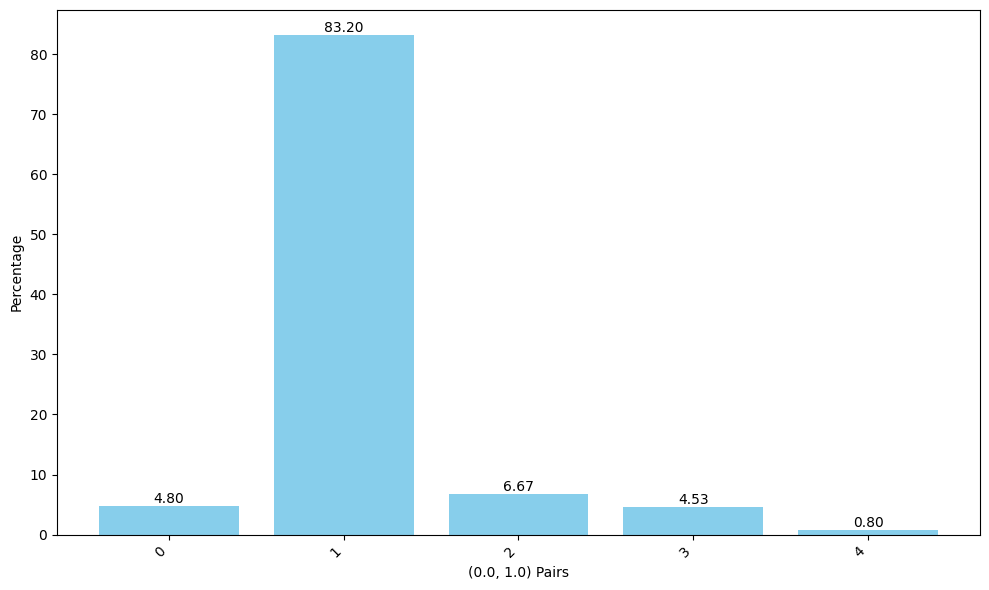

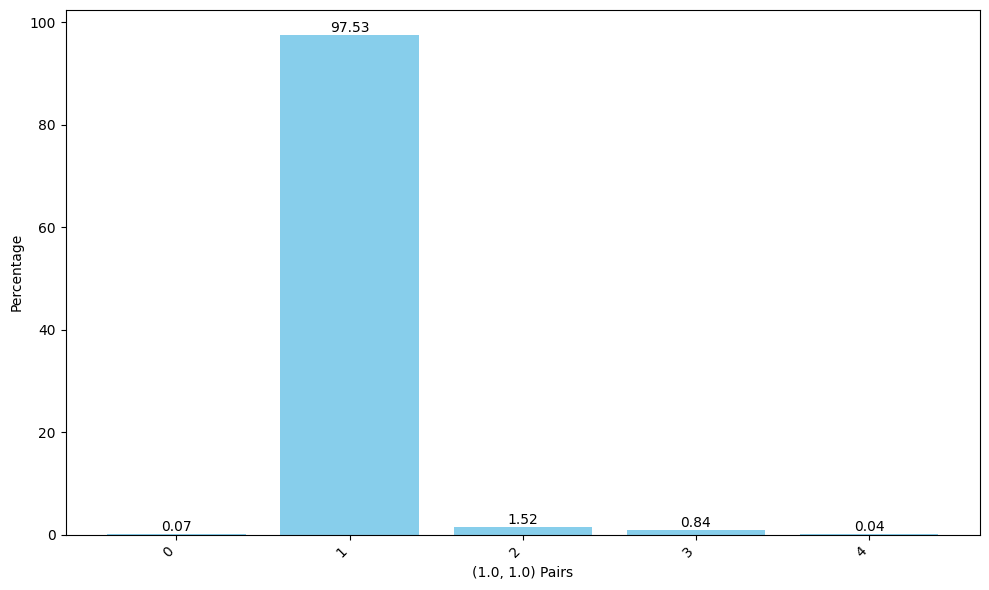

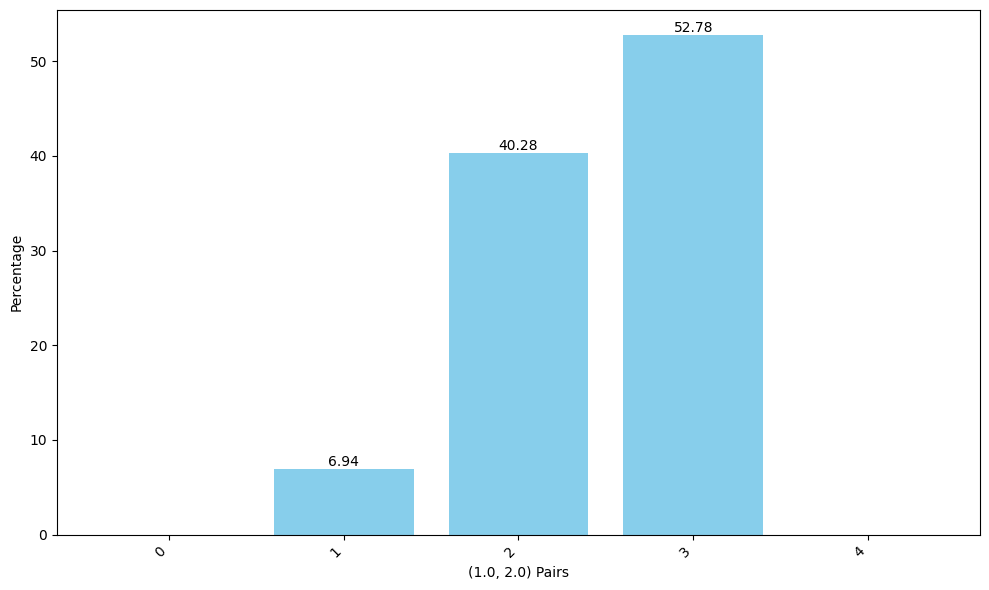

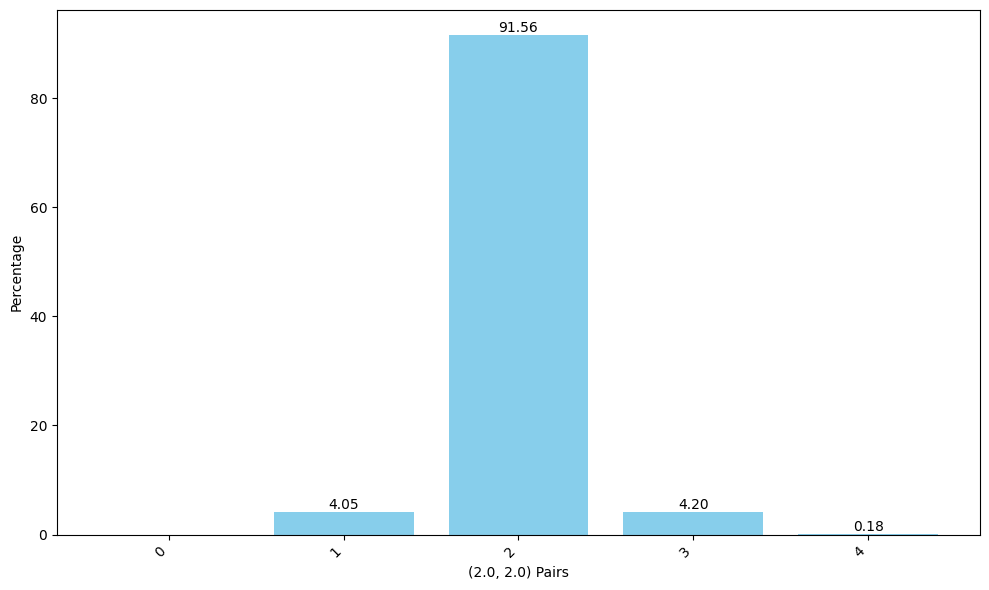

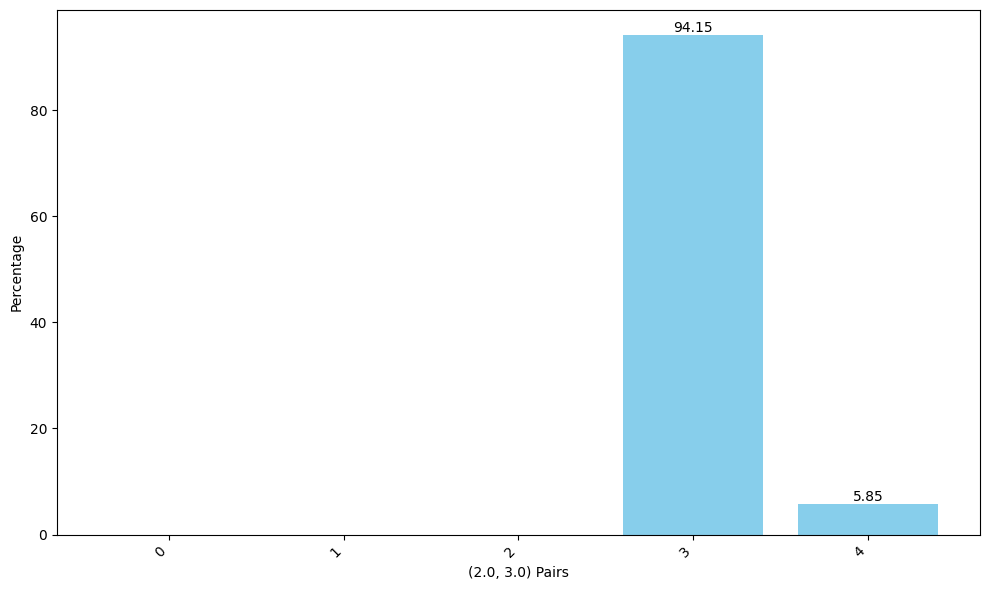

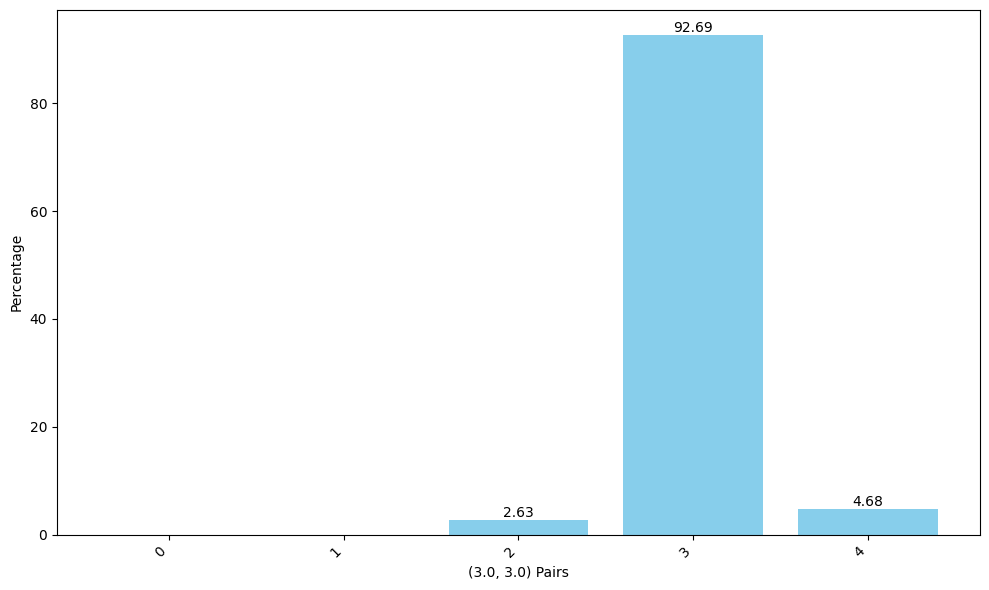

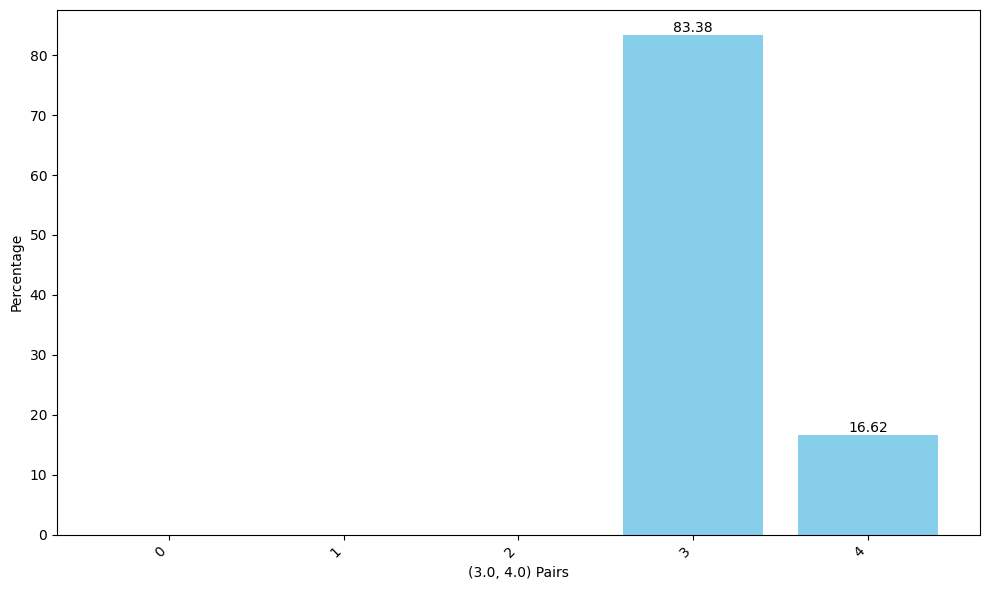

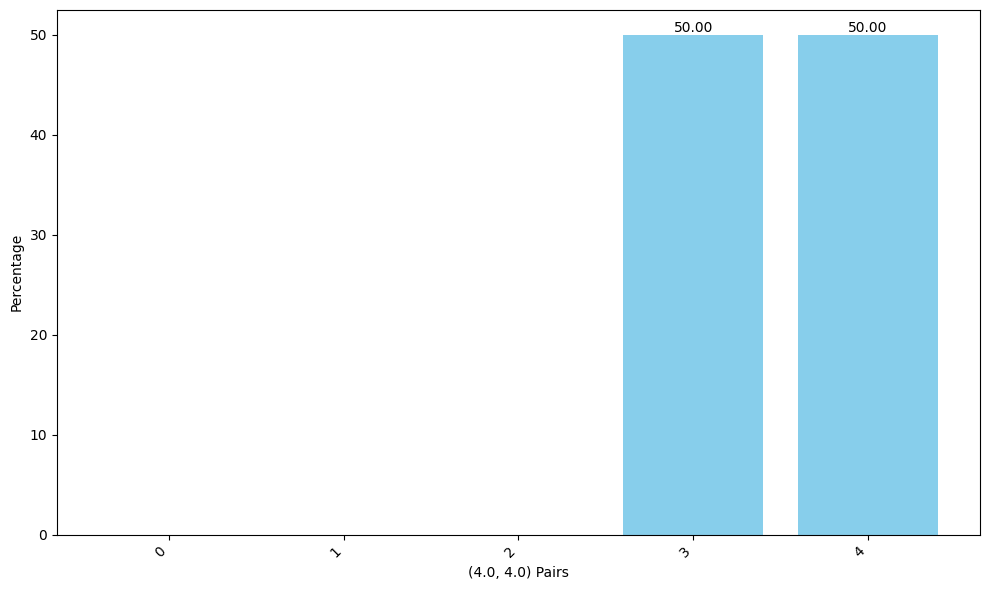

In [9]:
reporting(ga.first_y_test, ga.second_y_test, predicted_labels)